# 1.1 Keras tutorial
이번 실습에서는 keras를 이용하여 간단한 모델을 생성하고, 학습하여 성능을 평가한다.

In [ ]:
%matplotlib inline
import keras
import numpy as np
import matplotlib.pyplot as plt

## (1)데이터셋 준비
Input(x)와 Output(y) 간의 관계(y=x*3)를 학습하기 위한 데이터셋 준비

In [ ]:
x = np.arange(20) # 0, 1, 2, 3...., 19
y = x * 3


x_test =np.arange(50,70)
y_test = x_test*3
n_in =1
n_out =1

In [ ]:
plt.plot(x,y)

## (2) Keras 모델링
keras.layers : 모델을 구성하기 위한 layer들이 구현되어 있는 모듈

keras.models : layer들을 묶어 모델을 정의하고 학습, 평가, 예측 등의 기능을 구현한 모듈

In [ ]:
from keras import models, layers

Keras에서는 크게 Functional, Sequential 방식으로 모델을 구현

Function 방식은 모델을 수식처럼 구현

Sequential 방식은 모델에 필요한 layer들을 순차적으로 더해가는 방식으로 구현

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

Dense : Fully Connected Layer

https://keras.io/layers/core/#dense

### Sequential Modeling

In [ ]:
def modeling_sequential(n_in, n_out):
    model = models.Sequential()
    model.add(layers.Dense(units =n_out, input_shape=(n_in,)))
    return model

In [ ]:
class modeling_sequential_class(models.Sequential):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 선언
        self.n_in = n_in
        self.n_out = n_out
        
        #상속받은 Sequential 클래스 초기화 후 레이어 추가
        super().__init__()
        self.add(layers.Dense(units =n_out, input_shape=(n_in,)))

### Functional Modeling

In [ ]:
def modeling_functional(n_in, n_out):
    x = layers.Input(shape=(n_in,))
    y = layers.Dense(n_out)(x)
    model = models.Model(inputs = x, outputs = y)
    return model

In [ ]:
class modeling_functional_class(models.Model):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 및 레이어 선언
        self.n_in = n_in
        self.n_out = n_out
        input = layers.Input(shape=(n_in,))
        output = layers.Dense(n_out)
        
        # layer 연결
        x = input
        y = output(x)

        #상속받은 Model 클래스 초기화
        super().__init__(x, y)

### 모델 확인하기
생성된 모델은 내부함수인 summary()나, vis_utils의 model_to_dot()으로 모델 내부의 layers 구조 및 파라미터 수 등을 확인할 수 있음

In [ ]:
model =  modeling_sequential(n_in, n_out)
model.summary()

In [ ]:
model =  modeling_sequential_class(n_in, n_out)
model.summary()

In [ ]:
model =  modeling_functional(n_in, n_out)
model.summary()

In [ ]:
model = modeling_functional_class(n_in, n_out)
model.summary()

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## (3) 모델의 학습과정 설정
생성한 모델 객체의 compile 함수를 사용하여 학습과정 설정

모델의 학습시킬 때 사용할 loss function, optimizer, metric 등을 설정

https://keras.io/models/model/

In [ ]:
model.compile(loss='mse', optimizer='sgd')

## (4) 모델 학습시키기
모델 객체의 fit 함수를 사용하여 모델을 학습

fit 함수는 학습과정이 담겨있는 history 객체를 반환

In [ ]:
history = model.fit(x, y, batch_size=5, epochs=100, validation_split=0.2)

## (5) 모델 평가하기
모델 객체의 evaluate 함수로 test 데이터에 대한 모델의 성능을 평가

In [ ]:
loss= model.evaluate(x_test, y_test, batch_size=20)
print('loss : %.4f'%(loss))

## (6) 모델 사용하기
모델 객체의 predict 함수로 input 데이터에 대한 모델의 예측결과를 반환

In [ ]:
new_x = np.arange(100,120)
true_y = new_x*3

pred_y = model.predict(new_x, batch_size=20)
pred_y = np.reshape(pred_y,(-1,))
for y in zip(true_y, pred_y):
    print("true y : %.2f, prediction y : %.2f"%(y[0], y[1]))

# 1.1 MNIST Classification with Linear Classifier
이번 실습에서는 keras로 linear 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

In [ ]:
from keras.utils import np_utils
from keras import datasets
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

## (1) 데이터셋 다운로드
### Download the MNIST dataset
MNIST dataset은 28x28 사이즈의 이미지들로 0~9까지의 숫자 10개의 손글씨 이미지로 이루어져있다.

60,000장이 training에 사용되고 10,000장이 test에 사용된다.

In [ ]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)

In [ ]:
print('label : ',Y_train[0])
plt.imshow(X_train[0], cmap='gray')

input(X)를 flatten, normalize

output(Y)를 onehot encoding

In [ ]:
X_train_flat = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')/255.0
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_test_onehot = np_utils.to_categorical(Y_test)

print(X_train_flat.shape, Y_train_onehot.shape)

## (2) Keras 모델링

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

https://keras.io/layers/core/#input

Dense : Fully Connected Layer

https://keras.io/layers/core/#dense

Activation : Activation Function을 정의, 문자열로 입력

https://keras.io/layers/core/#activation

In [ ]:
n_in = 28*28   #784
n_out = np.shape(Y_test_onehot)[1] # 10

### Functional Modeling

In [ ]:
def linear_model_func(n_in, n_out):
    x = Input(shape=(n_in,))
    h = Dense(n_out)(x)
    y = Activation('softmax')(h)
    model = Model(inputs = x, outputs = y)
    return model

### Sequential Modeling

In [ ]:
def linear_model_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units =n_out, input_shape=(n_in,), activation='softmax'))
    return model

In [ ]:
model = linear_model_func(n_in, n_out)
model.summary()

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## (3) 모델의 학습과정 설정
accuracy를 측정할 수 있는 문제라면 metric에 accuracy를 설정

https://keras.io/models/model/

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

## (4) 모델 학습시키기

In [ ]:
history = model.fit(X_train_flat, Y_train_onehot, batch_size=128, epochs=20, validation_split=0.2)

## (5) 모델 평가하기

In [ ]:
loss_and_accuracy = model.evaluate(X_test_flat, Y_test_onehot, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

## (6) 모델 사용하기

In [ ]:
test_data = X_test[-1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('predict label : ',Y_test[-1])
plt.imshow(X_test[-1], cmap='gray')

# 1.2 MNIST Classification with DNN (to do)
이번 실습에서는 keras로 DNN 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

## (2) Keras 모델링

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

Dense : Fully Connected Layer

Activation : Activation Function을 정의, 문자열로 입력
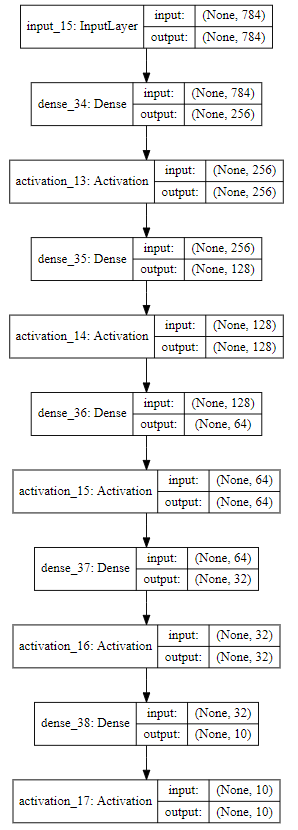

<맨 마지막 activation은 softmax로 하고 이외의 activation은 relu를 사용>

https://keras.io/layers/core/#activation

In [ ]:
def DNN_func(n_in, n_out):


def DNN_seq(n_in, n_out):


In [ ]:
n_in = 
n_out =
model = DNN_seq(n_in, n_out)

## (3) 모델의 학습과정 설정
<optimizer를 adam으로 설정>

## (4) 모델 학습시키기
<batch size를 256, epoch을 30, train 데이터 중 30%를 validation 데이터로 사용, verbose 모드는 2>

## (5) 모델 평가하기

## (6) 모델 사용하기